In [1]:
# Open Gym Environment
import gym
import gym_mppt

# # Check Gym Environments
# from gym import envs
# all_envs = envs.registry
# for key, value in sorted(all_envs.items(), key=lambda x: x[0]): 
#     print(key)

In [2]:
problem = 'mppt_shaded-v1'
env = gym.make(problem)

num_states = env.observation_space.shape[0]
print("Size of State Space ->  {}".format(num_states))
num_actions = env.action_space.shape[0]
print("Size of Action Space ->  {}".format(num_actions))

upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]

print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  3
Size of Action Space ->  1
Max Value of Action ->  15.0
Min Value of Action ->  -15.0


iteration 0


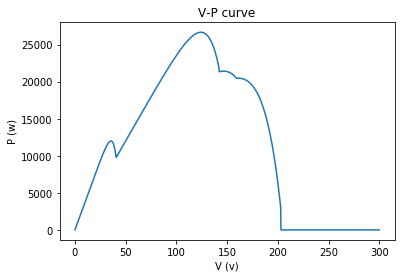

iteration 1


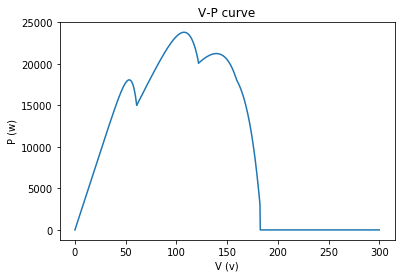

iteration 2


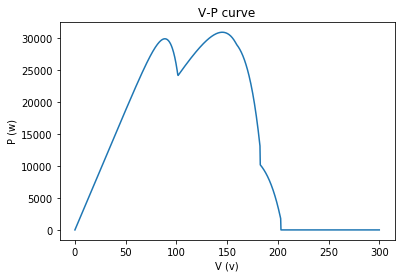

In [3]:
%run Graphs.ipynb
import warnings
warnings.filterwarnings('ignore')

observation = env.reset()
# print(observation)

irradiances = list([1000., 1000., 1000.])
temperatures = list([25., 25., 25.,])
# [a, 10, b, 10, c, 10]
sh = list([[2, 10, 10, 10, 7, 10],[9, 10, 3, 10, 6, 10],[5, 10, 9, 10, 10, 10]])

max_steps = 1000
# min_action = -5.
# max_action = 5.

observation = env.setTempIrr(observation, temperatures[0], irradiances[0], sh[0])
# data = DATA(observation, temperatures[0], irradiances[0])
data = [0] * len(temperatures)

for i in range(len(temperatures)):
    #observation =  env.reset()
    observation = env.reset()
    env.setTempIrr(observation, temperatures[i], irradiances[i], sh[i])
    data[i] = DATA(observation, temperatures[i], irradiances[i])
   
    for j in range(max_steps):
#         tf_observation = tf.expand_dims(tf.convert_to_tensor(observation), 0)    
        action = 0.3
#         action = policy(tf_observation, ou_noise)
#         action = np.clip(action,min_action,max_action)
#         print(action)

        observation, reward, done, info = env.step(action)
        data[i].add(observation[0], observation[1], observation[2], info['Corriente'], info['Temperatura'], info['Irradiancia'], info['Accion'])

#     data[i].plotear()
    print('iteration', i)
    plt.plot(data[i].V, data[i].P)
    plt.xlabel('V (v)')
    plt.ylabel('P (w)')
    plt.title('V-P curve')
    plt.show()
    
# print(data)

In [4]:
max(data[0].P)

26663.057097783687

In [5]:
max(data[1].P)

23810.120196199277

In [6]:
max(data[2].P)

30926.233305151767